<a href="https://colab.research.google.com/github/Kamil11-del/DIGITAL-IMAGE-PROCESSING/blob/main/CH_06_DIGITAL_IMG_PROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTENSITY SLICING COLOR CODING

In this code we did an example of intensity slicing and color coding, here we get the grayscale image and we slices its intensity into finite intervals , the image intensity is from [0,L-1] represent grayscale.the slice image have planes which are '0<p<L-1'.
In this after slicing the image we create a color map and this color map will be stored as tuple.

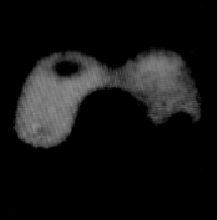

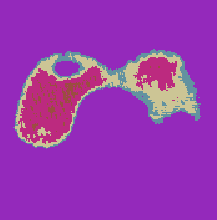

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def slicing_gray_img_coloring(img, slic_nums):
    colormap = []
    for _ in range(8):
        # Generate random RGB values
        color = tuple(np.random.randint(0, 256, size=3))
        colormap.append(color)
    interval_size = 256 // slic_nums
    color_coded_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for i in range(slic_nums):
        lower_bound = i * interval_size
        upper_bound = min((i + 1) * interval_size, 255)  # Ensure upper bound is capped at 255
        mask = cv2.inRange(img, lower_bound, upper_bound)
        color_coded_img[np.where(mask > 0)] = colormap[i]

    return color_coded_img

gray_img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0620(a)(picker_phantom).tif',cv2.IMREAD_GRAYSCALE)
cv2_imshow(gray_img)
num_intervals = 8
colored_coded_img= slicing_gray_img_coloring(gray_img,num_intervals)

cv2_imshow(colored_coded_img)


# COLOR TRANSFORMATION

HERE in this code snipet we process a colored image of RGB mode
we simply get the channel from the image and show it separately

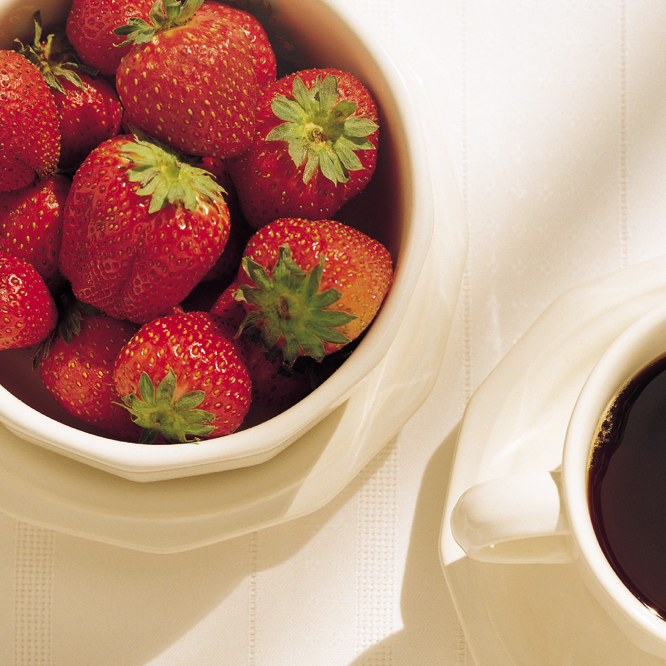

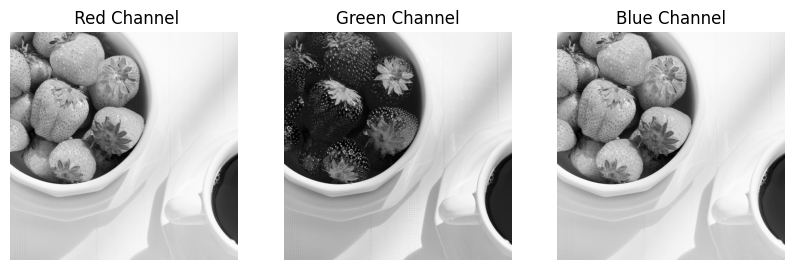

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0630(01)(strawberries_fullcolor).tif')

r_chanel = image[:,:,2]
g_chanel = image[:,:,1]
b_chanel = image[:,:,2]

cv2_imshow(image)
#showing the figure
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(r_chanel, cmap='gray')
plt.title(' Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g_chanel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b_chanel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# plt.subplot(1, 4, 4)
# plt.imshow(k, cmap='gray')
# plt.title('black Channel')
# plt.axis('off')

plt.show()

In [ ]:
def get_img_colr_mod(img):
  img_array = np.array(img)
  # Get the shape of the array
  height, width, channels = img_array.shape

# Determine the color mode based on the number of channels
  if channels == 3:
    return "RGB"
  elif channels == 4:
# Check if the image has transparency
    if img.mode == "CMYK":
      return "CMYK"
    else:
      return "RGB with Alpha"
  elif channels == 1:
    return "Grayscale"
  else:
    return "Unknown"

img_mod = get_img_colr_mod(image)
print(img_mod)

RGB


**RGB TO CMY CONVERSION:**

1.   assumption is that all RGB color values have been normalized to the
range [ , ]
2.   Then after normalizing the RGB values we will apply simple operation and which is for cyan = (1-red) bcz this pure color cyan don't contain the red color bcz of which it will reflect the blue and green color so to get the CYAN we will sub the Red color from 1 after normalization.
3.   to display each channel scaled it to 255


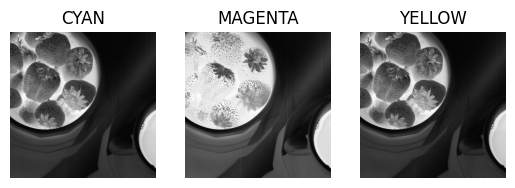

In [ ]:
#normalize the RGB color intensity with in [0,1] for operations
r = r_chanel/255.0
g = g_chanel/255.0
b = b_chanel/255.0

#here we will convert the rgb into cmy using some operation
c = 1-r
m = 1-g
y = 1-b

c_scaled = (c*255).astype(np.uint8)
m_scaled = (m*255).astype(np.uint8)
y_scaled = (y*255).astype(np.uint8)

images_list=[c_scaled,m_scaled,y_scaled]
images_titles=['CYAN','MAGENTA','YELLOW']
for i in range(len(images_list)):
  # plt.figure(figsize=(18,4))
  plt.subplot(1,3,i+1)
  plt.title(images_titles[i])
  plt.imshow(images_list[i],cmap='gray')
  plt.axis('off')


**ADDING 'K' TO CMY TO CREAT CMYK:**

As we know that pure CMY should produce black color but in practice combinig these pure color it produces muddy_looking brown so to produce true black we add the black color to each channel color which is 'K' and thus giving rise to CMYK model.
the K value will be get from letting 'K = min(CMY)'
the K value will be = 1 if the (C,M,Y)all three = (0,0,0)
But here in image we some values for the CMY channels so we will apply some operation to add the K value to each channel.

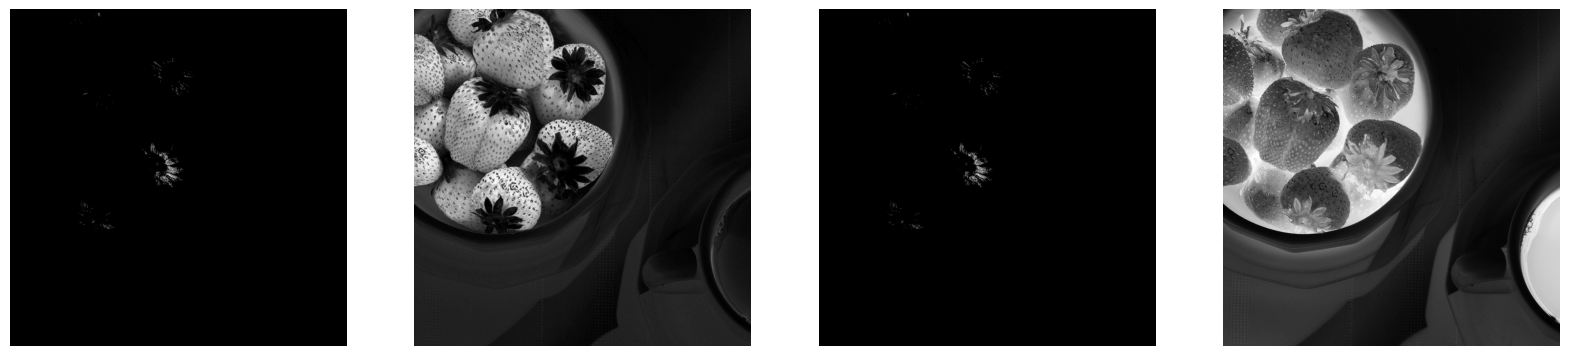

In [ ]:
c_norm = c/255
m_norm = m/255
y_norm = y/255

k = np.minimum.reduce([c_norm,m_norm,y_norm])

C_k = (c_norm-k)/(1-k)
M_k = (m_norm-k)/(1-k)
Y_k = (y_norm-k)/(1-k)

Ck_scaled = (C_k * 255)
Mk_scaled = (M_k * 255)
Yk_scaled = (Y_k * 255)
k_scaled = k*255

images_list=[Ck_scaled,Mk_scaled,Yk_scaled,k_scaled]
images_titles=['CYAN','MAGENTA','YELLOW','BLACK']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image in enumerate(images_list):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')


**RGB TO HSI**

1.   Read the RGB of image and normalize it between [0,1]
2.   find the theta
1.   apply operation to find the hue , sat, intenisty

In this code we convert the RGB to HSI with the help of some calculation.
in formula denomenator we add a very small value for avoiding dividing by zero bcz some time it becomes zero for example if R=G=B, in which case theta will be 90°.
we also take the np.degrees method bcz the operation of inverse cos give us value in radian and we want in degrees.


In [ ]:
def creating_hue(r,g,b):
  numenator = ((r-g)+(r-b)) / 2
  denomenator = ((r-g)**2 + ((r-b)*(g-b)))**0.5
  res_from_deno_numen = numenator/(denomenator+0.000001)
  theta =np.degrees(np.arccos(res_from_deno_numen))
  h = np.zeros_like(theta)
  h[b <=g] = theta[b <= g]
  h[b > g] = 360 - theta[b>g]
  h = h/360
  return (h*255)

def creating_saturation(r,g,b):
  s = 1 - (3 * np.minimum(r,g,b)/(r+g+b+0.000001))
  return (s*255).astype(np.uint8)

def creating_intensity(r,g,b):
  i = (1*(r+g+b))/3
  return (i*255).astype(np.uint8)

hue = creating_hue(r,g,b)
saturation= creating_saturation(r,g,b)
intensity = creating_intensity(r,g,b)

cv2_imshow(hue)
hsi_img_list = [saturation,intensity]
img_title = ['SATURATION','INTENSITY']
for i in range(len(hsi_img_list)):
  # plt.figure(figsize=(18,4))
  plt.subplot(1,2,i+1)
  plt.title(img_title[i])
  plt.imshow(hsi_img_list[i],cmap='gray')
  plt.axis('off')





NameError: name 'r' is not defined

**Transformation to change the intensity**

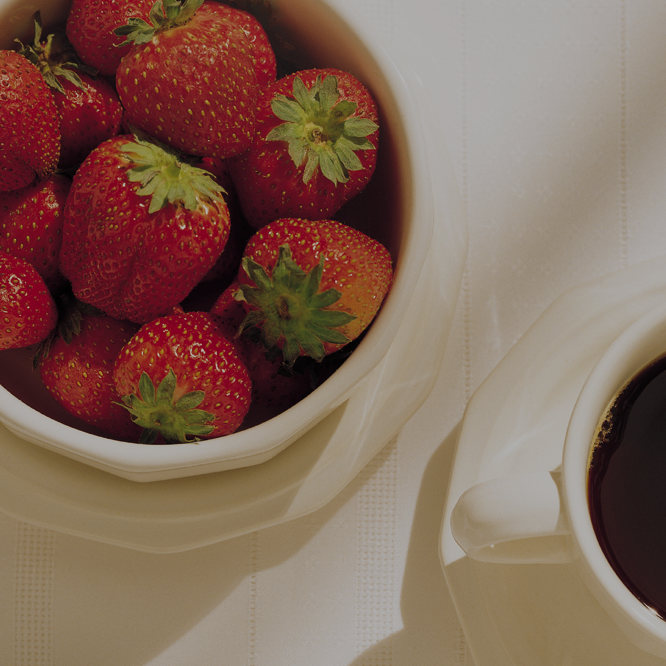

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

original_img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0631(a)(strawberries_coffee_full_color).tif')
r_chanel = original_img[:,:,2]
g_chanel = original_img[:,:,1]
b_chanel = original_img[:,:,0]
#normalizing each channels
norm_r = r_chanel/255
norm_g = g_chanel/255
norm_b = b_chanel/255
#getting the cmy channel from the RGB
c = 1-norm_r
m = 1-norm_g
y = 1-norm_b

k = 0.7
def transforming_intensity_rgb(image,r,g,b,k):
  #apply operations
  r = k * norm_r
  g = k * norm_g
  b = k * norm_b
  #scalling the channel back to 255
  r_scaled = r*255
  g_scaled = g*255
  b_scaled = b*255
  #creating image
  transformed_img = np.zeros_like(image)
  transformed_img[:,:,2]=r_scaled
  transformed_img[:,:,1]=g_scaled
  transformed_img[:,:,0]=b_scaled
  return transformed_img

#transforming the CMY CHANNELS
def transforming_intensity_cmy(img,c,m,y,k):
  c_trans = (k*c)+(1-k)
  m_trans = (k*m)+(1-k)
  y_trans = (k*y)+(1-k)
  #scaling the channel back to 255
  c_scaled = c_trans * 255
  m_scaled = m_trans * 255
  y_scaled = y_trans * 255
  #creating image
  transformed_img = np.zeros_like(img)
  transformed_img[:,:,2]=c_scaled
  transformed_img[:,:,1]=m_scaled
  transformed_img[:,:,0]=y_scaled
  return transformed_img

rgb_transformed_img = transforming_intensity_rgb(original_img,norm_r,norm_g,norm_b,k)
cmy_transformed_img = transforming_intensity_cmy(original_img,c,m,y,k)
cv2_imshow(rgb_transformed_img)

**From RGB TO HSI**

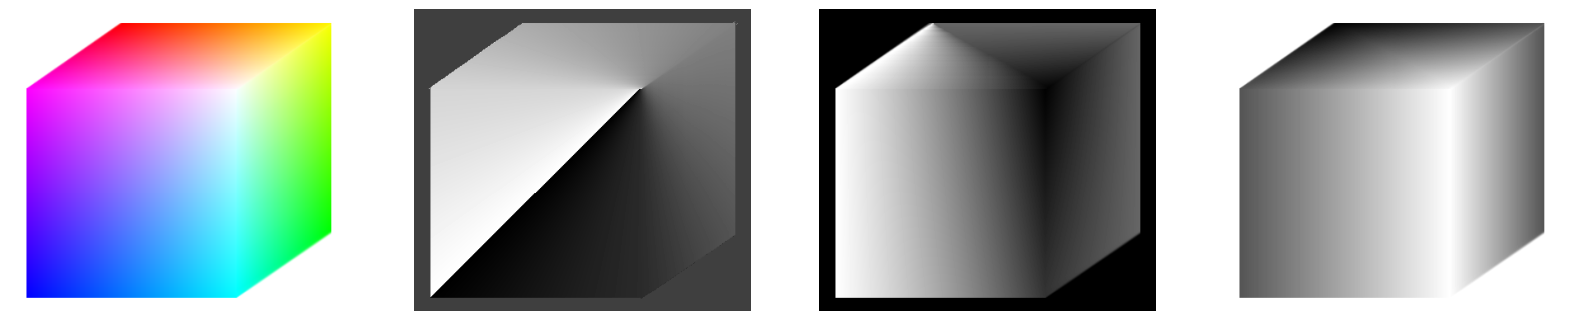

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0608(RGB-full-color-cube).tif')
r_chanel = image[:,:,2]
g_chanel = image[:,:,1]
b_chanel = image[:,:,0]

r = r_chanel/255.0
g = g_chanel/255.0
b = b_chanel/255.0

def creating_hue(r,g,b):
  numenator = ((r-g)+(r-b)) / 2
  denomenator = ((r-g)**2 + ((r-b)*(g-b)))**0.5
  res_from_deno_numen = numenator/(denomenator+0.000001)
  theta =np.degrees(np.arccos(res_from_deno_numen))
  h = np.zeros_like(theta)
  h[b <=g] = theta[b <= g]
  h[b > g] = 360 - theta[b>g]
  h = h/360
  return (h*255)

def creating_saturation(r,g,b):
  s = 1 - (((3/r+g+b+0.000001))* np.minimum(r,g,b))
  return (s*255)

def creating_intensity(r,g,b):
  i = (1*(r+g+b))/3
  return (i*255).astype(np.uint8)

hue = creating_hue(r,g,b)
saturation= creating_saturation(r,g,b)
intensity = creating_intensity(r,g,b)

img_list=[image,hue,saturation,intensity]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image in enumerate(img_list):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')


# Computing Color IMG Complements

complement : complement is the opposite color of some specific color
e.g the red in the original image is replaced by the CYAN color in the complements. In the context of color images, is similar to the negatives used in traditional color photography. In color photography, when you take a picture, the negative image has colors that are opposite to the colors in the actual scene

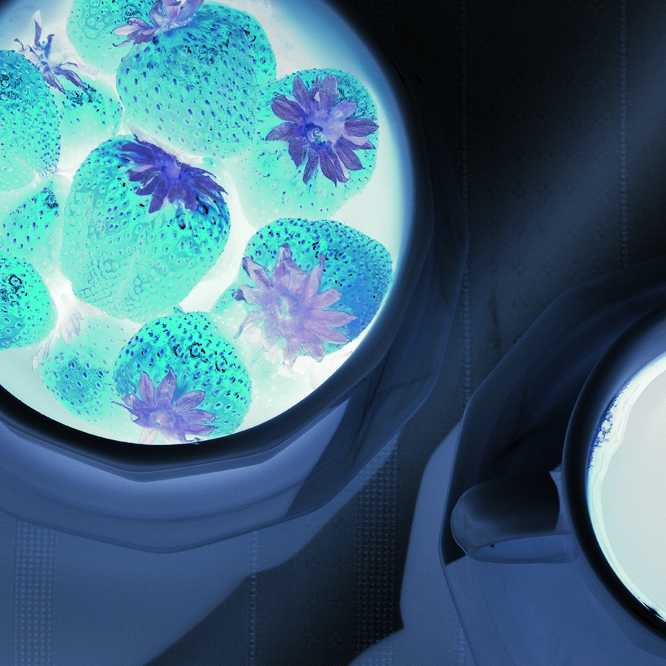

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0631(a)(strawberries_coffee_full_color).tif')
r_chanel = img[:,:,2]
g_chanel = original_img[:,:,1]
b_chanel = original_img[:,:,0]
#normalizing each channels
norm_r = r_chanel/255
norm_g = g_chanel/255
norm_b = b_chanel/255
#getting the cmy channel from the RGB
c = 1-norm_r
m = 1-norm_g
y = 1-norm_b

c_scaled = c * 255
m_scaled = m * 255
y_scaled = y * 255

cmy_img = np.zeros_like(img)
cmy_img[:,:,2]=c_scaled
cmy_img[:,:,1]=m_scaled
cmy_img[:,:,0]=y_scaled

cv2_imshow(cmy_img)



# COLOR SLICING

Color slicing is a technique in color image processing, which lets us separate certain objects from their surroundings. Furthermore, it works by filtering through only a certain band of color spectrum, essentially erasing all other colors beyond it.
In order to create a band of colors to slice from an image, we encapsulate them with a smaller cube or sphere inside the color cube.

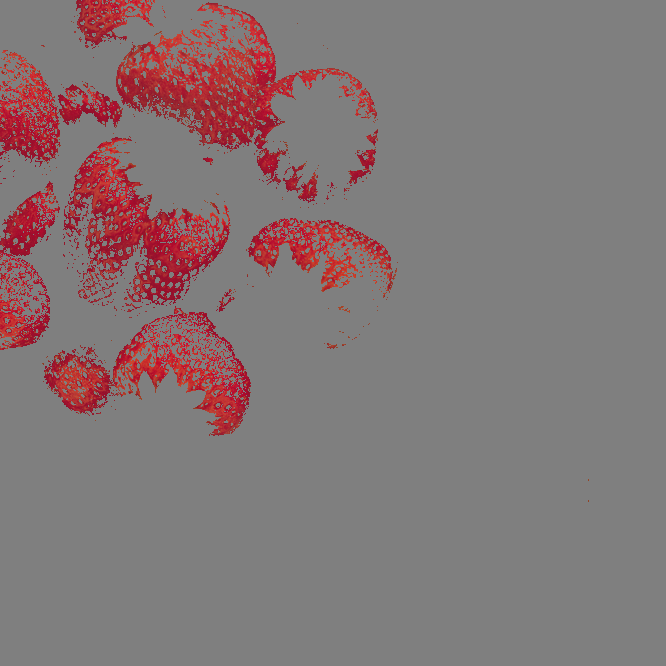

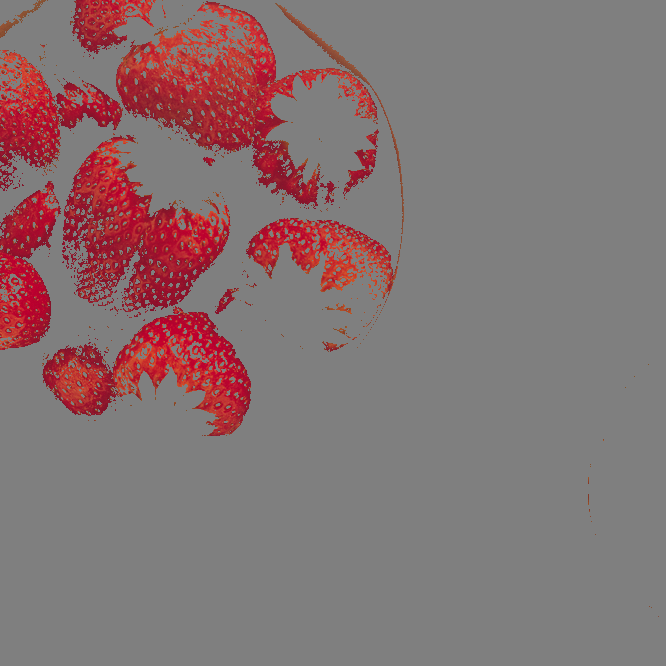

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0631(a)(strawberries_coffee_full_color).tif')

def color_slic_with_cube(image,width , protoType_color):
  norm_image = image/255
  differenc = np.abs(norm_image - protoType_color)
  mask = np.any(differenc > (width/2),axis = -1,keepdims=True)
  result = np.where(mask,0.5,norm_image)
  return result * 255

def color_slic_with_sphere(image,radius, protoType_color):
  norm_image = image/255
  sum= (norm_image - protoType_color)**2
  mask = np.any(sum > radius**2,axis = -1,keepdims=True)
  result = np.where(mask,0.5,norm_image)
  return result * 255

proto_type_color = np.full((1,1,3),[0.1922,0.1608,0.6863])
width =  0.2549
shpere_radius =  0.1765

color_sliced_img_cube = color_slic_with_cube(image,width,proto_type_color)
color_sliced_img_sphere = color_slic_with_sphere(image,shpere_radius,proto_type_color)

cv2_imshow(color_sliced_img_cube)
cv2_imshow(color_sliced_img_sphere)

# COLOR Correction or TONAL Transformation

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
input_image1 = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0635(top_ left_flower).tif',cv2.COLOR_BGR2RGB)
input_image2 = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0635(middle_row_left_chalk ).tif',cv2.COLOR_BGR2RGB)
input_image3 = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0635(bottom_left_stream).tif',cv2.COLOR_BGR2RGB)
#contrast value for stretching the change
contrast_factor = 2
gamma_value = 3
# defining function to correct color or tonal transformation
def clr_correction_by_contrast_stretchingFtn(image,cont_fact):
  # creating an image with zeros but same in shape as input_image
  output_image = np.zeros_like(image, dtype=np.float32)
  for channel in range(3):  # RGB channels
      # Calculate the mean of the channel
      channel_mean = np.mean(image[:, :, channel])

      # Apply contrast boosting to the channel
      output_image[:, :, channel] = ((image[:, :, channel] - channel_mean) * contrast_factor + channel_mean)
      #Clip the values to ensure they are within the valid range (0-255)
  output_image = np.clip(output_image, 0, 255).astype(np.uint8)
  return output_image

# defining a function to correct light or dark images by power law transformation
def tonal_transformation_by_powerLawr_transf(image,gamma):
  image = image/255
  output_image = np.zeros_like(image,dtype=np.float32)

  for channel in range(3):
    output_image[:,:,channel]=np.power(image[:,:,channel],gamma)
    output_image = np.clip(output_image,0,1)

  return output_image*255


result_of_corrected_flat_img = clr_correction_by_contrast_stretchingFtn(input_image1,contrast_factor)
result_of_corrected_light_img = tonal_transformation_by_powerLawr_transf(input_image2,gamma_value)
result_of_corrected_dark_img = tonal_transformation_by_powerLawr_transf(input_image3,0.5)

#resizing the images to show small than actual
resized_inputImage=cv2.resize(input_image2,(600,600))
resized_outputImage =cv2.resize(result_of_corrected_light_img,(600,600))
# cv2_imshow(resized_inputImage)
# cv2_imshow(resized_outputImage)
cv2_imshow(input_image3)
cv2_imshow(result_of_corrected_dark_img)



# COLOR BALANCING

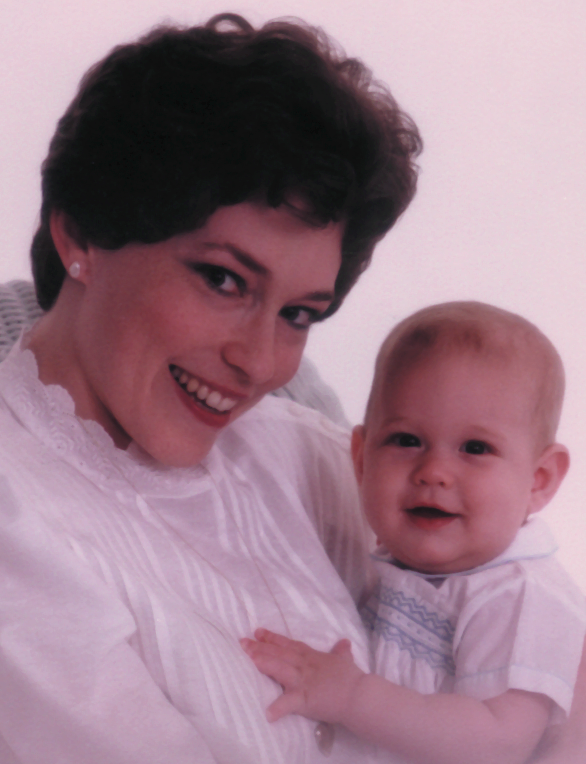

float64
(764, 586, 3)


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

input_img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0636(woman_baby_original).tif')

def rgb_to_cmy(rgb):
    cmy = 1 - rgb / 255.0
    return cmy

def cmy_to_cmyk(cmy):
    k = np.min(cmy, axis=-1)
    cmyk = np.stack([(cmy[..., i] - k) / (1 - k) for i in range(3)] + [k], axis=-1)
    return cmyk

def extend_and_transform_channels(cmyk_img, gamma):
    c = cmyk_img[:,:,0]
    m = cmyk_img[:,:,1]
    y = cmyk_img[:,:,2]
    k = cmyk_img[:,:,3]
    # Apply power-law transformation to the specified channel
    # k = np.power(k,gamma)
    # c = np.power(c,gamma)
    m =np.power(m,gamma)
    cmyk_img[:,:,1] = m

    return cmyk_img
def cmyk_to_cmy(cmyk):
    c_k = cmyk[:,:,0]
    m_k = cmyk[:,:,1]
    y_k = cmyk[:,:,2]
    k_k = cmyk[:,:,3]
    #apply operations
    c = c_k *(1-k_k)+k_k
    m = m_k *(1-k_k)+k_k
    y = y_k *(1-k_k)+k_k
    cmy =np.stack((c,m,y),axis = -1)
    return cmy

def cmy_to_rgb(cmy):
    rgb = (1 - cmy) * 255
    return rgb

rgb_to_cmy_img = rgb_to_cmy(input_img) #converting the rgb image to cmy image
cmy_to_cmyk_img = cmy_to_cmyk(rgb_to_cmy_img)# converting the cmy image to cmyk image
# cv2_imshow(cmy_to_cmyk_img)
gamma = 0.7
color_balanced_img = extend_and_transform_channels(cmy_to_cmyk_img,gamma)
cmyk_to_cmy_img = cmyk_to_cmy(color_balanced_img)
cmy_to_rgb_img = cmy_to_rgb(cmyk_to_cmy_img)

cv2_imshow(cmy_to_rgb_img)
print(cmy_to_rgb_img.dtype)
print(cmy_to_rgb_img.shape)



# Histogram Equalization in HSI space:

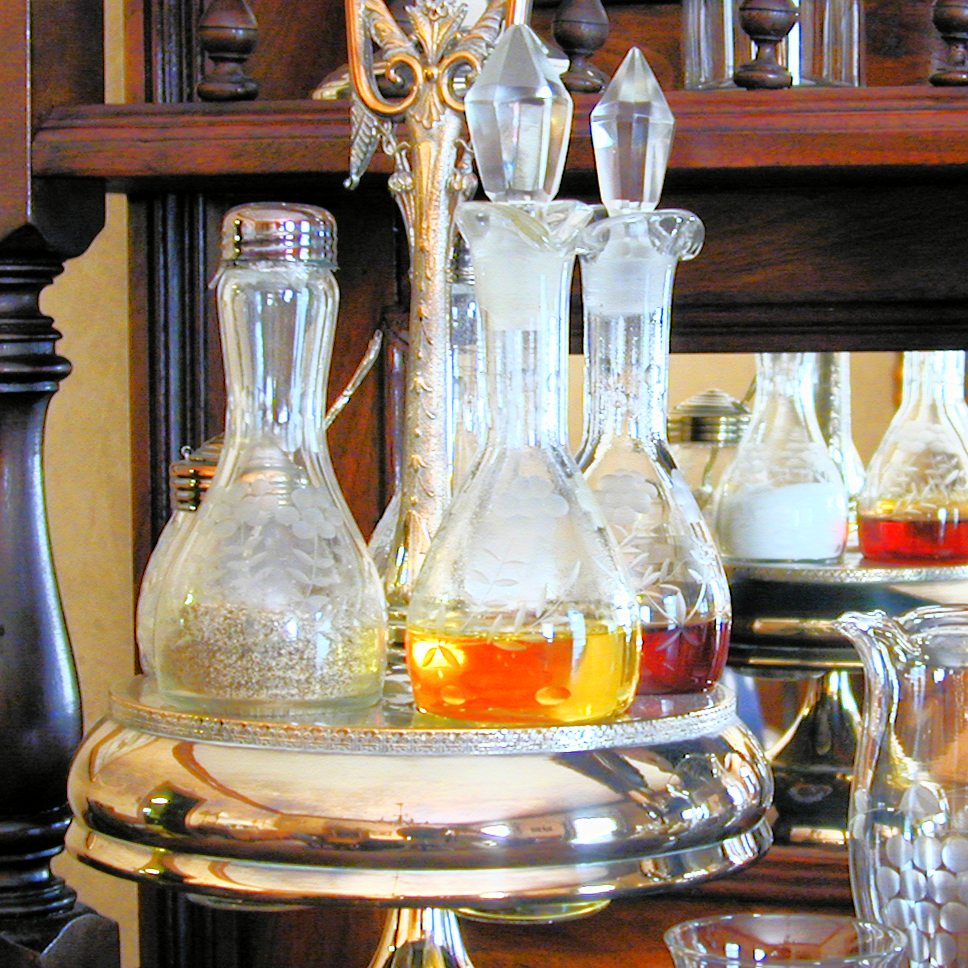

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

original_image = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0637(a)(caster_stand_original).tif')
r = original_image[:,:,2]
g= original_image[:,:,1]
b= original_image[:,:,0]

# DEFINING THE HISTOGRAM EQUALIZATION FUNCTION
def hist_equalized(image_comp, L = 256):
    pixels, nk = np.unique(image_comp, return_counts = True)
    m,n = image_comp.shape
    mn = m*n
    pr_rk = []
    for n in nk:
      pr_rk.append(n/mn)
    cdf = []
    temp = 0
    for i,val in enumerate(pr_rk):
      temp = temp + val
      cdf.append(temp)
    summation = dict(zip(pixels, cdf))
    equalized_image_comp = np.zeros_like(image_comp)
    for (h,w),x in np.ndenumerate(image_comp):
        equalized_image_comp[h][w] = np.floor((L-1)*summation[x])
    return equalized_image_comp

# CONVERTING RGB TO HSI
def convert_rgb2hsi(r,g,b):
  r = r / 255
  g = g / 255
  b = b / 255
  # H
  numerator = ((r-g) + (r-b)) / 2
  denominator = np.sqrt(0.0000001+((np.power(r-g,2))+((r-b)*(g-b))))
  theta = numerator / (denominator + 1e-15 )
  theta = np.degrees(np.arccos(theta))
  h = np.zeros_like(theta)
  h[b <= g] = theta[b <= g]
  h[b > g] = 360 - theta[b > g]
  h = (h / 360)
  h = np.clip(h,0,1)
  h *= 255

  # S
  denom = r + g + b
  min_rgb = np.minimum.reduce([r,g,b])
  s = 1 - (3 / (denom + 1e-10)) * min_rgb
  s = np.clip(s,0,1)
  s *= 255

  # I
  i = (r + g + b) / 3
  i = np.clip(i,0,1)
  i *= 255

  return [h,s,i]

# Convert HSI to RGB
def convert_hsi2rgb(hue,sat,inten):
  hue = (hue/255) * 360
  sat = sat/255
  inten = inten/255
  r,g,b = np.zeros_like(hue),np.zeros_like(hue),np.zeros_like(hue)
  for x in range(hue.shape[0]):
    for y in range(hue.shape[1]):
      h = hue[x,y]
      s = sat[x,y]
      i = inten[x,y]
      if h >= 0 and h < 120:
        b[x,y] = i * (1-s)
        r[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        g[x,y] = (3*i) - (r[x,y] + b[x,y])
      elif h >= 120 and h < 240:
        h = h - 120
        r[x,y] = i * (1-s)
        g[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        b[x,y] = (3*i) - (r[x,y] + g[x,y])
      else:
        h = h - 240
        g[x,y] = i * (1-s)
        b[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        r[x,y] = (3*i) - (b[x,y] + g[x,y])

  r , g , b = np.clip(r,0,1) * 255, np.clip(g,0,1) * 255, np.clip(b,0,1) * 255
  return np.stack((b,g,r),axis = -1)

# converting the RGB to HSI
h,s,i= convert_rgb2hsi(r,g,b)

i = i.astype(np.uint8)
#calling the histogram equalizationn function
eq_i = hist_equalized(i)
# converting the HSI to RGB
rgb_img = convert_hsi2rgb(h,s,eq_i)



# COLOR image Smoothing

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif')
r_ch = image[:,:,2]
g_ch = image[:,:,1]
b_ch = image[:,:,0]

def apply_smoothing_intensity(image_comp):
  kernel = np.ones((5,5)) * 1/25
  padded_img = np.pad(image_comp, pad_width=(5//2), mode= 'constant',constant_values= 0)

  output_img = np.zeros_like(image_comp)

  for i in range(image_comp.shape[0]):
    for j in range(image_comp.shape[1]):
    #extract the region
      region =padded_img[i:i+5, j:j+5]

    #applying convultion
      output_img[i,j] = np.sum(region *kernel)

  output_img = np.clip(output_img, 0,255)
  return output_img

def apply_smoothing_rgb_channels(image_chan,k_size):
  kernel = np.ones((k_size,k_size))*1/(k_size *k_size)
  padded_img = np.pad(image_chan, pad_width=k_size//2, mode='constant', constant_values=0)
  output_img = np.zeros_like(image_chan)

  for i in range(image_chan.shape[0]):
    for j in range(image_chan.shape[1]):
      extract_region = padded_img[i:i+k_size, j:j+k_size]
      output_img[i,j] =np.sum(extract_region * kernel)
  return output_img

# applying smoothing filter to intensity component in HSI SPACE
hue,sat,intens = convert_rgb2hsi(r_ch,g_ch,b_ch)
intens_smoothed_5 = apply_smoothing_intensity(intens)
image_hsi_to_rgb = convert_hsi2rgb(hue,sat,intens_smoothed_5)
cv2_imshow(image_hsi_to_rgb)
ker_size = 5
rgb_image = np.zeros_like(image)
r_s, g_s,b_s = apply_smoothing_rgb_channels(r_ch,ker_size), apply_smoothing_rgb_channels(g_ch,ker_size),apply_smoothing_rgb_channels(b_ch,ker_size)
rgb_image[:,:,2] = r_s
rgb_image[:,:,1] = g_s
rgb_image[:,:,0] = b_s

cv2_imshow(image)
cv2_imshow(rgb_image)

# COLOR IMAGE SHARPENING

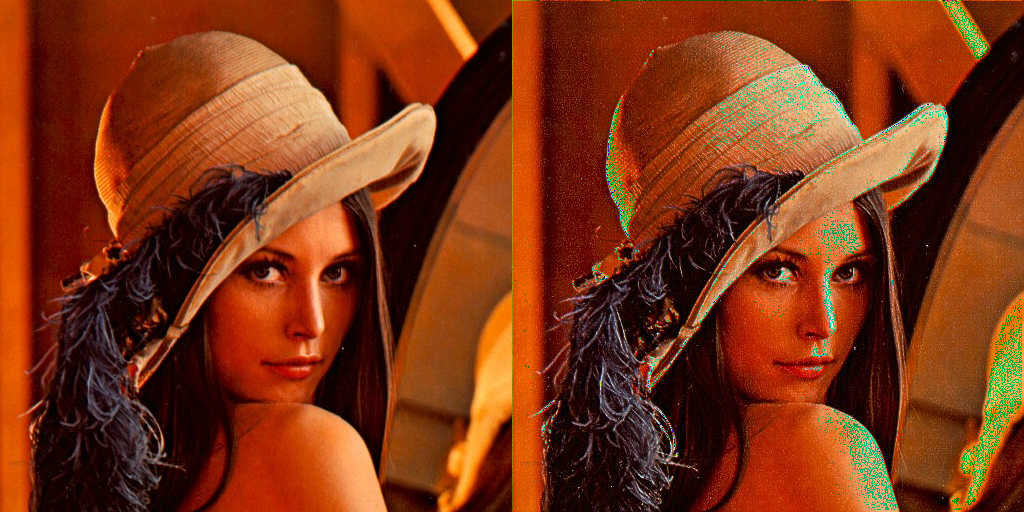

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

my_img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif')

def rgb_chan_sharpening(channel_img):
  kernel = np.array([[0,-1,0],
                     [-1,4,-1],
                     [0,-1,0]])
  k_size = kernel.shape[0]//2

  padd_img = np.pad(channel_img,pad_width = k_size, mode='constant',constant_values = 0)

  output_img = np.zeros_like(channel_img)

  for i in range(k_size,channel_img.shape[0] -k_size):
    for j in range(k_size,channel_img.shape[1]-k_size):

      region = padd_img[i-k_size:i+k_size+1,j-k_size:j+k_size+1]

      output_img[i-k_size,j-k_size] = 0 if np.sum(region * kernel) < 0 else np.sum(region * kernel)
  return output_img
#extracting channels
r= my_img[:,:,2]
g= my_img[:,:,1]
b= my_img[:,:,0]

# new rgb like my image
rgb_img = np.zeros_like(my_img)

r_sharp,g_sharp, b_sharp = rgb_chan_sharpening(r),rgb_chan_sharpening(g),rgb_chan_sharpening(b)

rgb_img[:,:,2] = r_sharp
rgb_img[:,:,1] = g_sharp
rgb_img[:,:,0] = b_sharp

#apply laplacian formula on (kernel applied on image)
sharpened_img = my_img +(1* rgb_img)
cv2_imshow(cv2.hconcat([my_img,sharpened_img]))

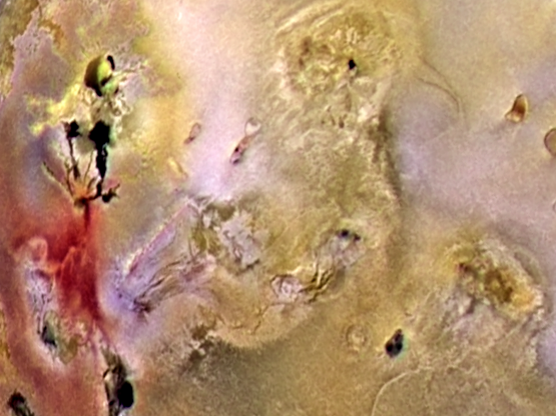

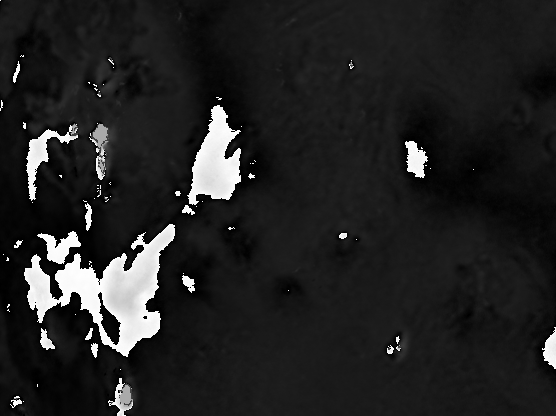

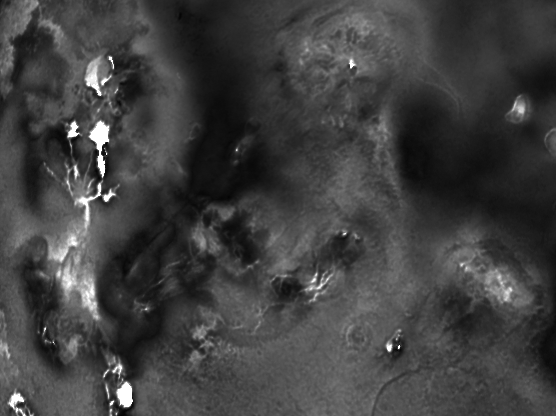

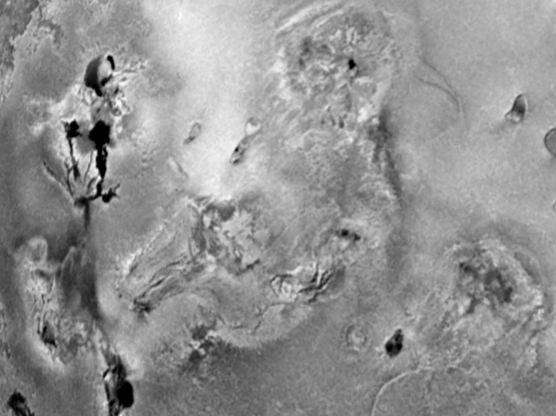

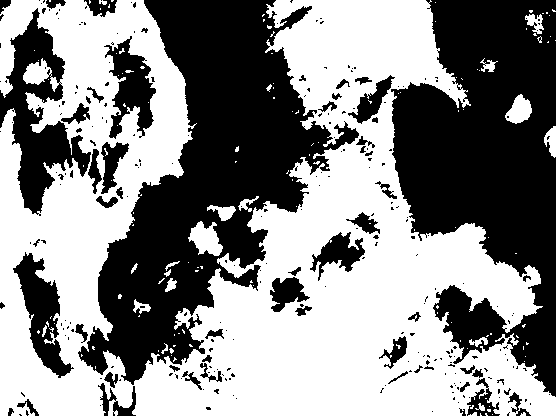

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0642(a)(jupiter_moon_original).tif')
r = img1[:,:,2]
g = img1[:,:,1]
b = img1[:,:,0]

def generate_bin_mask(img_comp):
  threshold_value = 60 # calculation 10% of maximum in the image
  binary_mask = np.where(img_comp > threshold_value, 255,0)
  return binary_mask
# calling the function which will convert RGB TO HSI
h,s,intens = convert_rgb2hsi(r,g,b)
# generating the binary mask by thresholding saturation
bin_mask = generate_bin_mask(s)
cv2_imshow(img1)
cv2_imshow(h)
cv2_imshow(s)
cv2_imshow(intens)
cv2_imshow(bin_mask)

# product of hue and binary mask
norm_h = h/255
norm_bin_mask = bin_mask/255
prod_mask_h = (norm_h * norm_bin_mask) *255

cv2_imshow(prod_mask_h)



In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/DIP3E_CH06_Original_Images/DIP3E_Original_Images_CH06/Fig0642(a)(jupiter_moon_original).tif')

def segmenting_color_img(image,avg_clr, std):
  box_min = avg_clr - 2.0 * std
  box_max = avg_clr + 2.0 *  std

  segmented_img = np.zeros_like(image[:,:,2], dtype = np.uint8)

  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      pixel = image[row,col]
      if(box_min[0] <= pixel[0] <= box_max[0]) and \
        (box_min[1] <= pixel[1] <= box_max[1]) and \
        (box_min[2] <= pixel[2] <= box_max[2]):
        segmented_img[row,col] = 255
      else:
        segmented_img[row,col] = 0
  return segmented_img

# Flatten the image to a 2D array
flattened_image = img.reshape(-1, 3)
red_channel = img[:, :, 2]
# Calculate mean along each column (axis=0) to get average R, G, and B values
avg_clr = np.mean(red_channel)

# Calculate standard deviation along each column (axis=0) to get standard deviation of R, G, and B values
std_dev = np.std(flattened_image, axis=0)

segmented_img = segmenting_color_img(img,avg_clr,std_dev)
cv2_imshow(img)